# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = os.path.join("Output Data", "cities.csv")

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Data

### Generate Random Cities

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of 1500 random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [3]:
# Run a test call to view JSON structure
url = "http://api.openweathermap.org/data/2.5/weather?"
town = "Lisbon"
query_url = f"{url}q={town}&appid={weather_api_key}"
response = requests.get(query_url).json()
response

{'coord': {'lon': -9.1333, 'lat': 38.7167},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 288.01,
  'feels_like': 287.48,
  'temp_min': 287.05,
  'temp_max': 288.82,
  'pressure': 1022,
  'humidity': 74},
 'visibility': 10000,
 'wind': {'speed': 6.69, 'deg': 330},
 'clouds': {'all': 0},
 'dt': 1622853401,
 'sys': {'type': 1,
  'id': 6901,
  'country': 'PT',
  'sunrise': 1622869947,
  'sunset': 1622923078},
 'timezone': 3600,
 'id': 2267057,
 'name': 'Lisbon',
 'cod': 200}

In [4]:
# Basic API call URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Create empty lists to hold data from API calls
call_city = []
call_city_num = []
lat = []
long = []
temp = []
humid = []
cloudy = []
wind_sp = []

# Perform API calls using random cities generated
# Append data for each city to the relevant list
for city in cities:
    query_url = f"{url}q={city}&appid={weather_api_key}"
    response = requests.get(query_url).json()
    
    try:
        name = response['name']
        id_num = response['id']
        call_city.append(response['name'])
        call_city_num.append(response['id'])
        lat.append(response['coord']['lat'])
        long.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        humid.append(response['main']['humidity'])
        cloudy.append(response['clouds']['all'])
        wind_sp.append(response['wind']['speed'])
        print(f"{name}, ID {id_num} has been located.")
    
    except:
        pass

Husavik, ID 2629833 has been located.
Qaanaaq, ID 3831208 has been located.
Hilo, ID 5855927 has been located.
Ozinki, ID 513329 has been located.
Bambous Virieux, ID 1106677 has been located.
Winslow, ID 5321473 has been located.
Dārāb, ID 137956 has been located.
Dikson, ID 1507390 has been located.
Barrow, ID 5880054 has been located.
Bayan, ID 2038421 has been located.
Bethel, ID 5282297 has been located.
Severnyy, ID 496358 has been located.
The Valley, ID 3573374 has been located.
Rikitea, ID 4030556 has been located.
Huarmey, ID 3939168 has been located.
Mukono, ID 228853 has been located.
Blagoyevo, ID 576093 has been located.
Busselton, ID 2075265 has been located.
Thompson, ID 6165406 has been located.
Pineville, ID 4337291 has been located.
Mataura, ID 6201424 has been located.
Cherskiy, ID 2126199 has been located.
Khatanga, ID 2022572 has been located.
Lompoc, ID 5367788 has been located.
Port Alfred, ID 964432 has been located.
Kundiawa, ID 2093059 has been located.
Cape 

Beloha, ID 1067565 has been located.
Parral, ID 4004867 has been located.
Wakkanai, ID 2127515 has been located.
Olsztyn, ID 763166 has been located.
Chokurdakh, ID 2126123 has been located.
Takāb, ID 113508 has been located.
Cabo San Lucas, ID 3985710 has been located.
Nanortalik, ID 3421765 has been located.
Ciudad Bolivar, ID 3645532 has been located.
Souillac, ID 933995 has been located.
Ahipara, ID 2194098 has been located.
Mackay, ID 2159220 has been located.
Saint-Philippe, ID 935215 has been located.
Pacific Grove, ID 5380437 has been located.
Tilichiki, ID 2120591 has been located.
Mossamedes, ID 3347019 has been located.
Bahār, ID 142000 has been located.
Itaituba, ID 3397967 has been located.
Norman Wells, ID 6089245 has been located.
Westport, ID 4845585 has been located.
Sur, ID 286245 has been located.
Kikwit, ID 2314705 has been located.
Kajaani, ID 654899 has been located.
San Policarpo, ID 1688696 has been located.
Dingle, ID 1714733 has been located.
Kuruman, ID 98613

Jimo, ID 1805757 has been located.
Haines Junction, ID 5969025 has been located.
Beisfjord, ID 3144987 has been located.
Ilhabela, ID 3461425 has been located.
Coachella, ID 5338166 has been located.
Benxi, ID 2038300 has been located.
Menongue, ID 3347353 has been located.
Biak, ID 1637001 has been located.
Hofn, ID 2630299 has been located.
Sarāi Mīr, ID 1257260 has been located.
Asău, ID 686090 has been located.
Zhigansk, ID 2012530 has been located.
Moshenskoye, ID 525025 has been located.
Vredendal, ID 3359736 has been located.
Jining, ID 1805518 has been located.
Townsville, ID 2146142 has been located.
Zelenoborskiy, ID 463838 has been located.
Metro, ID 1635283 has been located.
Barinas, ID 3648546 has been located.
Villagarzón, ID 3665992 has been located.
Atar, ID 2381334 has been located.
Moussoro, ID 2427336 has been located.
Przhevalskoye, ID 514127 has been located.
Saint Paul Harbor, ID 5866583 has been located.
Arlit, ID 2447513 has been located.
Mae Sai, ID 1152194 has

## Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create a dataframe from weather data lists
df = pd.DataFrame(list(zip(call_city, call_city_num, lat, long, temp, humid, cloudy, wind_sp)),
                 columns = ['City', 'City ID', 'Latitude', 'Longitude', 'Temperature (k)', 'Humidity (%)', 'Cloudiness (%)', 'Wind Speed (m/sec)'])
df

,City,City ID,Latitude,Longitude,Temperature (k),Humidity (%),Cloudiness (%),Wind Speed (m/sec)
0,Husavik,2629833,66.0449,-17.3389,283.10,94,100,0.50
1,Qaanaaq,3831208,77.4840,-69.3632,272.91,81,100,2.02
2,Hilo,5855927,19.7297,-155.0900,300.40,63,1,5.66
3,Ozinki,513329,51.1786,49.6769,287.53,79,98,2.67
4,Bambous Virieux,1106677,-20.3428,57.7575,295.52,100,75,6.17
...,...,...,...,...,...,...,...,...
547,Shirokiy,2016680,49.7580,129.5230,284.75,92,100,4.09
548,The Pas,6164499,53.8251,-101.2541,298.16,31,20,1.14
549,Ngunguru,2186111,-35.6167,174.5000,292.04,74,100,5.36
550,Nkowakowa,970341,-23.8878,30.2871,275.18,78,0,1.28


In [6]:
# Send dataframe to CSV file
df.to_csv(output_data_file, index=False)

## Inspect Data
----
###  Remove Cities where Humidity > 100%
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
# Ensure no cities have humidity values > 100%
df.sort_values('Humidity (%)')

,City,City ID,Latitude,Longitude,Temperature (k),Humidity (%),Cloudiness (%),Wind Speed (m/sec)
98,Medina,109223,24.4686,39.6142,309.15,7,0,2.57
440,Arlit,2447513,18.7369,7.3853,306.81,10,0,3.97
403,Saint George,5546220,37.1041,-113.5841,313.25,10,1,0.89
6,Dārāb,137956,28.7519,54.5444,302.09,10,0,1.76
305,Kidal,2455290,18.4411,1.4078,307.84,11,4,3.74
...,...,...,...,...,...,...,...,...
409,Toamasina,1053384,-18.1667,49.3833,292.15,100,40,1.03
255,Ucluelet,6171633,48.9329,-125.5528,284.90,100,90,7.20
144,Punta Arenas,3874787,-53.1500,-70.9167,273.93,100,90,3.60
114,Marystown,6067472,47.1666,-55.1483,284.18,100,100,4.09


### Convert Data Units

In [8]:
# Convert Kelvin temps to Fahrenheit temps
df['Temperature (F)'] = (df['Temperature (k)'] - 273.15) * 9/5 + 32

# Convert wind speed in meters per sec to MPH
df['Wind Speed (mph)'] = (df['Wind Speed (m/sec)'] * 2.237)

df

,City,City ID,Latitude,Longitude,Temperature (k),Humidity (%),Cloudiness (%),Wind Speed (m/sec),Temperature (F),Wind Speed (mph)
0,Husavik,2629833,66.0449,-17.3389,283.10,94,100,0.50,49.910,1.11850
1,Qaanaaq,3831208,77.4840,-69.3632,272.91,81,100,2.02,31.568,4.51874
2,Hilo,5855927,19.7297,-155.0900,300.40,63,1,5.66,81.050,12.66142
3,Ozinki,513329,51.1786,49.6769,287.53,79,98,2.67,57.884,5.97279
4,Bambous Virieux,1106677,-20.3428,57.7575,295.52,100,75,6.17,72.266,13.80229
...,...,...,...,...,...,...,...,...,...,...
547,Shirokiy,2016680,49.7580,129.5230,284.75,92,100,4.09,52.880,9.14933
548,The Pas,6164499,53.8251,-101.2541,298.16,31,20,1.14,77.018,2.55018
549,Ngunguru,2186111,-35.6167,174.5000,292.04,74,100,5.36,66.002,11.99032
550,Nkowakowa,970341,-23.8878,30.2871,275.18,78,0,1.28,35.654,2.86336


## Plot the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

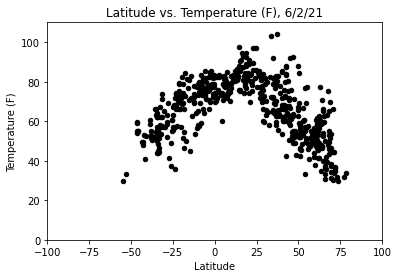

<Figure size 432x288 with 0 Axes>

In [9]:
# Create scatter plot comparing latitude to temperature
df.plot(kind='scatter',x='Latitude',y='Temperature (F)',color='black')
plt.title('Latitude vs. Temperature (F), 6/2/21')
plt.xlim(-100, 100)
plt.ylim(0, 110)

# Display the chart
plt.show()

# Set file path for image
image_path = os.path.join("Output Data", "lat_temp_scatter.png")

# Save chart as image
plt.savefig(image_path)

### Latitude vs. Humidity Plot

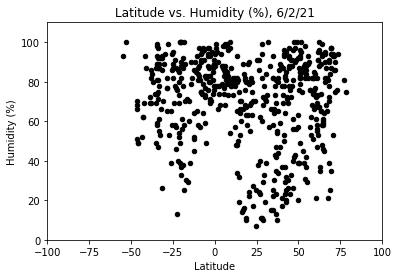

<Figure size 432x288 with 0 Axes>

In [10]:
# Create scatter plot comparing latitude to humidity
df.plot(kind='scatter',x='Latitude',y='Humidity (%)',color='black')
plt.title('Latitude vs. Humidity (%), 6/2/21')
plt.xlim(-100, 100)
plt.ylim(0, 110)

# Display the chart
plt.show()

# Set file path for image
image_path = os.path.join("Output Data", "lat_humid_scatter.png")

# Save chart as image
plt.savefig(image_path)

### Latitude vs. Cloudiness Plot

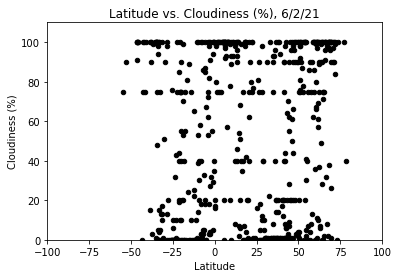

<Figure size 432x288 with 0 Axes>

In [11]:
# Create scatter plot comparing latitude to cloudiness
df.plot(kind='scatter',x='Latitude',y='Cloudiness (%)',color='black')
plt.title('Latitude vs. Cloudiness (%), 6/2/21')
plt.xlim(-100, 100)
plt.ylim(0, 110)

# Display the chart
plt.show()

# Set file path for image
image_path = os.path.join("Output Data", "lat_cloud_scatter.png")

# Save chart as image
plt.savefig(image_path)

### Latitude vs. Wind Speed Plot

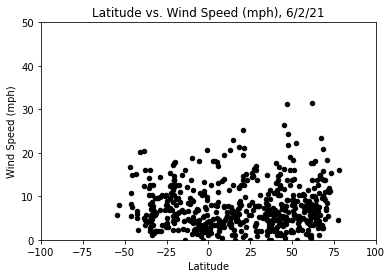

<Figure size 432x288 with 0 Axes>

In [12]:
# Create scatter plot comparing latitude to wind speed
df.plot(kind='scatter',x='Latitude',y='Wind Speed (mph)',color='black')
plt.title('Latitude vs. Wind Speed (mph), 6/2/21')
plt.xlim(-100, 100)
plt.ylim(0, 50)

# Display the chart
plt.show()

# Set file path for image
image_path = os.path.join("Output Data", "lat_wind_scatter.png")

# Save chart as image
plt.savefig(image_path)

## Linear Regression

### Divide Cities into Hemispheres

In [77]:
# Assign N/S hemisphere variable
df['Hemisphere'] = np.where(df['Latitude'] < 0, "Southern", "Northern")

# Create northern hemisphere df
north_df = df.loc[df['Hemisphere'] == "Northern", :].copy().reset_index(drop=True)

# Create southern hemisphere df
south_df = df.loc[df['Hemisphere'] == "Southern", :].copy().reset_index(drop=True)

### Create Function to Run Regressions

In [96]:
# Create a function to generate all plots
def city_regress(dataset, column):
    x_val = dataset['Latitude']
    y_val = dataset[column]
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
    regress_values = x_val * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_val,y_val)
    plt.plot(x_val,regress_values,"r-")
    plt.title(f'Latitude vs. {column}')
    plt.xlabel('Latitude')
    plt.ylabel(column)
    plt.xlim(-90, 0)
    plt.annotate(line_eq,(-80,20),fontsize=15,color="red")
    if (column == 'Temperature (F)'):
        plt.ylim(0, 110)
    elif (column == 'Wind Speed (mph)'):
        plt.ylim(0, 50)
    else:
        plt.ylim(0, 100)
    if (dataset['Hemisphere'][1] == 'Northern'):
        plt.xlim(0, 90)
        plt.annotate(line_eq,(10,20),fontsize=15,color="red")
    else:
        pass
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

###  Northern Hemisphere - Temperature (F) vs. Latitude Linear Regression

The r-squared is: 0.5786309576392166


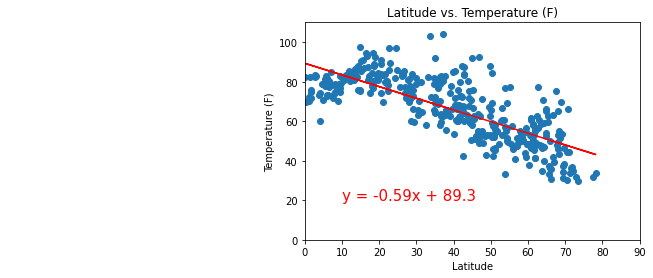

In [97]:
city_regress(north_df, 'Temperature (F)')

###  Southern Hemisphere - Temperature (F) vs. Latitude Linear Regression

The r-squared is: 0.5423474442551816


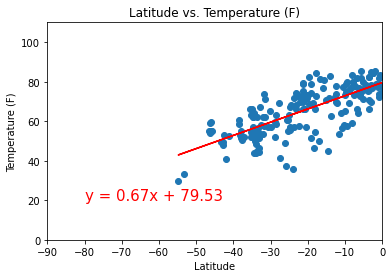

In [98]:
city_regress(south_df, 'Temperature (F)')

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0010752884959320203


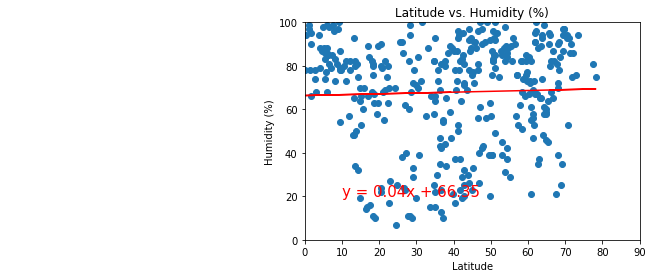

In [99]:
city_regress(north_df, 'Humidity (%)')

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.0158422263461672


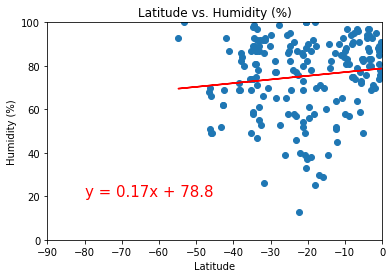

In [100]:
city_regress(south_df, 'Humidity (%)')

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.0016665510896106594


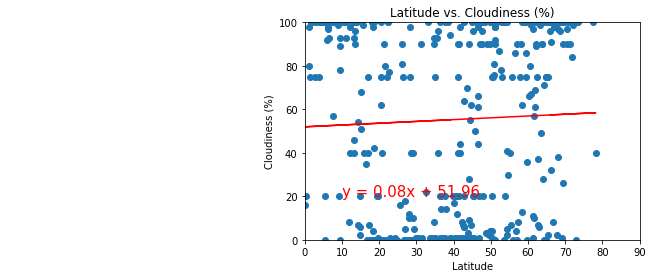

In [101]:
city_regress(north_df, 'Cloudiness (%)')

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.02123595088090997


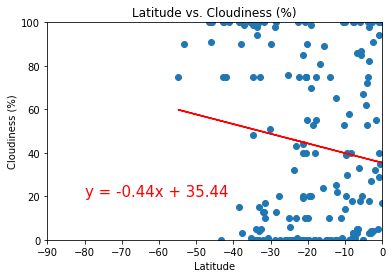

In [102]:
city_regress(south_df, 'Cloudiness (%)')

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.009195396789278788


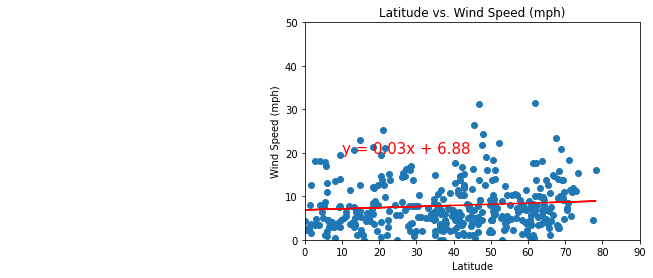

In [103]:
city_regress(north_df, 'Wind Speed (mph)')

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03730835138947564


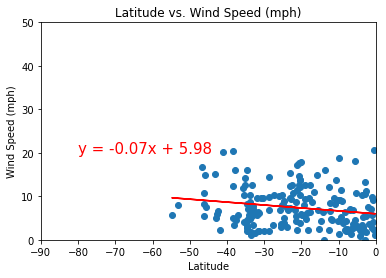

In [104]:
city_regress(south_df, 'Wind Speed (mph)')